In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, GRU, Embedding, CuDNNGRU
from tensorflow.python.keras.optimizers import Adam
from tensorflow.python.keras.preprocessing.text import Tokenizer
from tensorflow.python.keras.preprocessing.sequence import pad_sequences

In [4]:
veriseti = pd.read_csv('dataset.csv')

In [5]:
veriseti

,Rating,Review
0,1,3 yıldır tık demedi. :)
1,1,3 yıldır kullanıyorum müthiş
2,1,Ürün bugün elime geçti çok fazla inceleme fırs...
3,1,Almaya karar verdim. Hemencecik geldi. Keyifle...
4,1,Günlük kullanımınızı çok çok iyi karsılıyor kı...
...,...,...
243492,1,fiyatına göre güzel
243493,1,Ürün kullanışlı iş görüyor fazlasıyla eşime al...
243494,1,"Hızlı Kargo, güzel ürün"
243495,1,telefon başarılı hızlı bir cihaz sadece beyaz...


In [6]:
etiket = veriseti['Rating'].values.tolist()
yorum = veriseti['Review'].values.tolist()

Capraz Dogrulama %80 = Egitim Seti - %20 = Test Seti

In [7]:
kesim_noktasi = int(len(yorum) * 0.80)
yorum_egitim, yorum_test = yorum[:kesim_noktasi], yorum[kesim_noktasi:]
etiket_egitim, etiket_test = etiket[:kesim_noktasi], etiket[kesim_noktasi:]

In [8]:
yorum_egitim[1997]

'Piyasada bilinen çok kaliteli bir ürün. uygun fiyatlı olusundan dolayı çok iyi bir seçim oldu benim için.'

In [9]:
etiket_egitim[1997]

1

Tokenlestirme

In [10]:
max_kelime = 10000
tokenizer = Tokenizer(num_words = max_kelime)

In [11]:
tokenizer.fit_on_texts(yorum)

In [12]:
tokenizer.word_index

{'çok': 1,
 'bir': 2,
 've': 3,
 'ürün': 4,
 'bu': 5,
 'iyi': 6,
 'güzel': 7,
 'için': 8,
 'tavsiye': 9,
 'ederim': 10,
 'daha': 11,
 'ama': 12,
 'da': 13,
 'gayet': 14,
 'hızlı': 15,
 'teşekkürler': 16,
 'aldım': 17,
 'de': 18,
 'ürünü': 19,
 'gibi': 20,
 'yok': 21,
 'uygun': 22,
 'olarak': 23,
 'kaliteli': 24,
 'en': 25,
 '2': 26,
 'kargo': 27,
 'fiyat': 28,
 'elime': 29,
 'kadar': 30,
 'ile': 31,
 'göre': 32,
 'geldi': 33,
 'var': 34,
 'hepsiburada': 35,
 'ben': 36,
 'gerçekten': 37,
 '1': 38,
 'fiyata': 39,
 'gün': 40,
 'sonra': 41,
 'cok': 42,
 'kesinlikle': 43,
 'telefon': 44,
 'biraz': 45,
 'hiç': 46,
 'ulaştı': 47,
 'memnun': 48,
 'hem': 49,
 'değil': 50,
 'kullanışlı': 51,
 '3': 52,
 'mükemmel': 53,
 'oldu': 54,
 'kullanıyorum': 55,
 'önce': 56,
 'sipariş': 57,
 'tek': 58,
 'her': 59,
 'bence': 60,
 'harika': 61,
 'kalitesi': 62,
 'bi': 63,
 'ayrıca': 64,
 '5': 65,
 'teşekkür': 66,
 'fiyatı': 67,
 'olması': 68,
 'ne': 69,
 'herkese': 70,
 'bile': 71,
 'uzun': 72,
 'süper': 73,

In [13]:
yorum_egitim_tokenler = tokenizer.texts_to_sequences(yorum_egitim)

In [14]:
yorum_egitim[1997]

'Piyasada bilinen çok kaliteli bir ürün. uygun fiyatlı olusundan dolayı çok iyi bir seçim oldu benim için.'

In [15]:
yorum_egitim_tokenler[1997]

[417, 1903, 1, 24, 2, 4, 22, 678, 258, 1, 6, 2, 1534, 54, 119, 8]

In [16]:
yorum_test_tokenler = tokenizer.texts_to_sequences(yorum_test)

In [17]:
toplam_tokenler = [len(tokenler) for tokenler in yorum_egitim_tokenler + yorum_test_tokenler]
toplam_tokenler = np.array(toplam_tokenler)

In [18]:
np.mean(toplam_tokenler)

20.744703220162876

In [19]:
np.max(toplam_tokenler)

295

In [20]:
np.argmax(toplam_tokenler)

21941

In [21]:
yorum_egitim[21941]

'Özellikle bu kısma yazıyorum iyice okuyunuz,cihazın hızı çok iyi.Isınma normal boyutlarda.Kamerası elinizi sabit tutarsanız ve gündüz çok net gece ise çok net çekmez.Görüntülü konuşma özelliği yok ancak uygulama ile olur,anten çekimi gayet iyi.Parmak izi okuyucusu gayet hızlı bazen tuşu silmenizi istiyor ve okuyamıyor kirden vs...Ön kamera da tatmin edici,çekim esnasında ekran beyaz ışık vererek flaş görevi görür.Batarya bana 1 hafta gidiyor sık kullanımda ise 2-3 gün gidiyor.Hızlı şarj 1 saatte doluyor , şekilleri ele oturuyor ve şık bir görüntü var.Telefonu aldığım gün gittim ve ilk girdiğim yerden ekran koruyucu ve kılıf buldum.Kulaklık sesi çok net ve yüksek ancak kendi hoparlörü biraz zayıf sesi.Ekrana bakarken açık kalma özelliği yok.Diğer akıllı cihaz özellikleri %90 ı bu cihazda mevcut.Güç tasarrufu 2 ayrı modu var ve çok başarılı çalışıyor.4gb ram var genelde yarısı boş kalıyor.Bir de yeni cihazların çoğu titreşimi az ve sesi de az çıkıyor.Bu cihaz da içine dahil...Bu cihazla

Padding

In [22]:
max_token = np.mean(toplam_tokenler) + 2 * np.std(toplam_tokenler)
max_token = int(max_token)
max_token

59

In [23]:
np.sum(toplam_tokenler < max_token) / len(toplam_tokenler)

0.9597982726686571

In [24]:
yorum_egitim_pad = pad_sequences(yorum_egitim_tokenler, maxlen = max_token)

In [25]:
yorum_test_pad = pad_sequences(yorum_test_tokenler, maxlen = max_token)

In [26]:
yorum_egitim_pad.shape

(194797, 59)

In [27]:
yorum_test_pad.shape

(48700, 59)

In [28]:
(yorum_egitim[1997])

'Piyasada bilinen çok kaliteli bir ürün. uygun fiyatlı olusundan dolayı çok iyi bir seçim oldu benim için.'

In [29]:
np.array(yorum_egitim_tokenler[1997])

array([ 417, 1903,    1,   24,    2,    4,   22,  678,  258,    1,    6,
          2, 1534,   54,  119,    8])

In [30]:
yorum_egitim_pad[1997]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,  417,
       1903,    1,   24,    2,    4,   22,  678,  258,    1,    6,    2,
       1534,   54,  119,    8])

In [31]:
yorum_id = tokenizer.word_index
ters_map = dict(zip(yorum_id.values(), yorum_id.keys()))

In [32]:
def token_tostr(tokenler):
    kelimeler = [ters_map[token] for token in tokenler if token!=0]
    str = ' '.join(kelimeler)
    return str

In [33]:
yorum_egitim[1997]

'Piyasada bilinen çok kaliteli bir ürün. uygun fiyatlı olusundan dolayı çok iyi bir seçim oldu benim için.'

In [34]:
token_tostr(yorum_egitim_tokenler[1997])

'piyasada bilinen çok kaliteli bir ürün uygun fiyatlı dolayı çok iyi bir seçim oldu benim için'

Sinir agı modelleme

In [35]:
model = Sequential()

In [36]:
embedding_boyut = 50

In [37]:
model.add(Embedding(input_dim = max_kelime, output_dim = embedding_boyut, input_length = max_token, name = 'embedding_katman'))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [38]:
model.add(CuDNNGRU(units = 16, return_sequences = True))
model.add(CuDNNGRU(units = 8, return_sequences = True))
model.add(CuDNNGRU(units = 4, return_sequences = False))
model.add(Dense(1, activation ='sigmoid'))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [39]:
optimizer = Adam(lr = 1e-3)

In [40]:
model.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [41]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_katman (Embedding) (None, 59, 50)            500000    
_________________________________________________________________
cu_dnngru (CuDNNGRU)         (None, 59, 16)            3264      
_________________________________________________________________
cu_dnngru_1 (CuDNNGRU)       (None, 59, 8)             624       
_________________________________________________________________
cu_dnngru_2 (CuDNNGRU)       (None, 4)                 168       
_________________________________________________________________
dense (Dense)                (None, 1)                 5         
Total params: 504,061
Trainable params: 504,061
Non-trainable params: 0
_________________________________________________________________


In [42]:
model_history = model.fit(yorum_egitim_pad, etiket_egitim, epochs=5, batch_size=256)

Epoch 1/5
194797/194797 [==============================] - 23s 117us/sample - loss: 0.1533 - acc: 0.9561
Epoch 2/5
194797/194797 [==============================] - 13s 69us/sample - loss: 0.0884 - acc: 0.9707
Epoch 3/5
194797/194797 [==============================] - 13s 68us/sample - loss: 0.0720 - acc: 0.9769
Epoch 4/5
194797/194797 [==============================] - 13s 68us/sample - loss: 0.0591 - acc: 0.9816
Epoch 5/5
194797/194797 [==============================] - 13s 69us/sample - loss: 0.0477 - acc: 0.9864


In [43]:
sonuc = model.evaluate(yorum_test_pad, etiket_test)

48700/48700 [==============================] - 9s 177us/sample - loss: 0.1572 - acc: 0.9510


In [44]:
sonuc[1]

0.95104724

In [45]:
get_pred_values = np.concatenate((yorum_egitim_pad, yorum_test_pad))

In [46]:
get_pred_values.shape

(243497, 59)

Test

In [47]:
etiket_pred = model.predict(x=get_pred_values[:])
etiket_pred = etiket_pred.T[0]

In [48]:
tahmin_pred = np.array([1.0 if p>0.5 else 0.0 for p in etiket_pred])

In [49]:
tahmin_true = np.array(etiket[:])

In [50]:
tahmin_incorrect = np.where(tahmin_pred != tahmin_true)
tahmin_incorrect = tahmin_incorrect[0]

In [51]:
len(tahmin_incorrect)

4008

In [52]:
metin1 = "Başarılı bir ürün"
metin2 = "Hiç beğenmedim tavsiye etmem"
metin3 = "Fena değil"
metin4 = "Şüphe etmeden alabilirsiniz"
metin5 = "Kesinlikle berbat bir ürün"
metin6 = "Başlangıçta emin değildim ama kesinlikle iyi"
metin7 = "Almayın para israfı. Resmen rezalet"
metin8 = "Başta emin değildim ama kullandıktan sonra bütün fikirlerim değişti"
metin9 = "Ürün güzel ama 3 ay bekledim"
metinler = [metin1,metin2,metin3,metin4,metin5,metin6,metin7,metin8,metin9]

In [53]:
tokenler = tokenizer.texts_to_sequences(metinler)

In [54]:
tokenler_pad = pad_sequences(tokenler, maxlen=max_token)
tokenler_pad.shape

(9, 59)

In [55]:
model.predict(tokenler_pad)

array([[0.9963355 ],
       [0.00594464],
       [0.5680386 ],
       [0.99583006],
       [0.0323604 ],
       [0.99722064],
       [0.00841597],
       [0.9962953 ],
       [0.6479189 ]], dtype=float32)

In [56]:
model_history.history

{'loss': [0.15330341137833625,
  0.08838466756951567,
  0.07200251764210468,
  0.05908317036894886,
  0.04774817728720953],
 'acc': [0.95610815, 0.9706926, 0.97685283, 0.9816424, 0.9863858]}

In [57]:
sonuc

[0.15715212535602663, 0.95104724]

In [58]:
tahmin_pred #tüm tahmimler

array([1., 1., 1., ..., 1., 1., 1.])

In [59]:
tahmin_pred.shape

(243497,)

In [60]:
#fileop = open("input.csv","w")

In [61]:
headers = ["Strings","Labels","Predicts","TrainAcc","TrainLoss","TestAcc","TestLoss"]

In [62]:
strings = yorum
labels = etiket

In [63]:
predicts = tahmin_pred

In [64]:
x = model_history.history

In [65]:
eaccs = [0,0,0,0,0]
eloss = [0,0,0,0,0]
for i in range(5):
    eaccs[i] = x["acc"][i]
    eloss[i] = x["loss"][i]

In [66]:
eaccs

[0.95610815, 0.9706926, 0.97685283, 0.9816424, 0.9863858]

In [67]:
eloss

[0.15330341137833625,
 0.08838466756951567,
 0.07200251764210468,
 0.05908317036894886,
 0.04774817728720953]

In [68]:
taccs = float(sonuc[1])
tloss = float(sonuc[0])

In [69]:
tloss

0.15715212535602663

In [70]:
taccs

0.9510472416877747

In [71]:
gEaccs = eaccs
gEloss = eloss
gTaccs = str(taccs)
gTloss = str(tloss)

In [72]:
#def fill_List(l,value):
#    myList = l
#    x = len(l)
#    tekrar = value - x
#    for i in range(tekrar):
#        myList.append("-1")
#    return myList

In [73]:
#def fill_Floats(f,value):
#    myList = [f]
#    x = len(myList)
#    tekrar = value - x
#    for i in range(tekrar):
#        myList.append("-1")
#    return myList

In [74]:
#eaccs = fill_List(eaccs,len(strings))
#eloss = fill_List(eloss,len(strings))
#taccs = fill_Floats(taccs,len(strings))
#tloss = fill_Floats(tloss,len(strings))

In [75]:
myDict = {
    "headers": headers,
    "strings": strings,
    "labels": labels,
    "predicts": predicts,
    "trainaccuracy": eaccs,
    "trainloss": eloss,
    "testaccuracy": taccs,
    "testloss": tloss
    }

In [76]:
myDict

{'headers': ['Strings',
  'Labels',
  'Predicts',
  'TrainAcc',
  'TrainLoss',
  'TestAcc',
  'TestLoss'],
 'strings': ['3 yıldır tık demedi. :)',
  '3 yıldır kullanıyorum müthiş ',
  'Ürün bugün elime geçti çok fazla inceleme fırsatım olmadı ancak gözüme çarpan ilk şey usb bağlantısı için pil kapağının altında çok güzel yer yapmış olmaları, daha önceden o aparatı kaybetmiş biri olarak bu özelliğini çok sevdim. Ayrıca 1000dpi olması çok iyi bu tip farelerin çoğu 800dpi oluyor. Eğer sizde benim gibi masaüstü bilgisayarınızdan oyuncu faresi ile yüksek dpi ayarına alışmış biriyseniz windows ayarından fareyi en hızlıya getirin ve bu fareyi sipariş verin pişman olmazsınız. Teşekkürler Logitech',
  'Almaya karar verdim. Hemencecik geldi. Keyifle kullanıyorum',
  'Günlük kullanımınızı çok çok iyi karsılıyor kısaca mükemmel',
  'gayet güzel',
  'Çok kaliteli bir ürün ve fiyatı da uygun. Uzun araştırmalarım sonucu aldım ve çok memnunum.',
  'yaklaşık 5 senedir kullanıyorum. defalarca düşmesine 

In [77]:
#for i in myDict["headers"]:
#    if(i != myDict["headers"][-1]):
#        fileop.write(i)
#        fileop.write("_@@_")
#    else:
#        fileop.write(i)
#        break
#fileop.write("\n")
#count = len(strings)
#for i in range(count):
#    fileop.write(myDict["strings"][i])
#    fileop.write("_@@_")
#    fileop.write(str(myDict["labels"][i]))
#    fileop.write("_@@_")
#    fileop.write(str(int(myDict["predicts"][i])))
#    fileop.write("_@@_")
#    fileop.write(str(myDict["trainaccuracy"][i]))
#    fileop.write("_@@_")
#    fileop.write(str(myDict["trainloss"][i]))
#    fileop.write("_@@_")
#    fileop.write(str(myDict["testaccuracy"][i]))
#    fileop.write("_@@_")
#    fileop.write(str(myDict["testloss"][i]))
#    fileop.write("\n")

In [78]:
#fileop.close()

In [79]:
#guiDataset = pd.read_csv('input.csv', delimiter = "_@@_")

In [80]:
#x = guiDataset['TestAcc'].values.tolist()
#x

In [81]:
import os
save_path = r"C:\Users\alike\Desktop\finalAIPSA\final\AIPSAapp2"
stringsName = os.path.join(save_path, "strings.txt")
labelsName = os.path.join(save_path, "labels.txt")
predictsName = os.path.join(save_path, "predicts.txt")
eaccsName = os.path.join(save_path, "eaccs.txt")
elossName = os.path.join(save_path, "eloss.txt")
taccsName = os.path.join(save_path, "taccs.txt")
tlossName = os.path.join(save_path, "tloss.txt")

In [82]:
file_strings = open(stringsName,"w")
file_labels = open(labelsName,"w")
file_predicts = open(predictsName,"w")
file_eaccs = open(eaccsName,"w")
file_eloss = open(elossName,"w")
file_taccs = open(taccsName,"w")
file_tloss = open(tlossName,"w")

In [83]:
for i in range(len(strings)):
    if(i != 100):
        file_strings.write(strings[i])
        file_strings.write("\n")
    else:
        break
file_strings.close()

In [84]:
for i in range(len(labels)):
    if(i != 100):
        file_labels.write(str(labels[i]))
        file_labels.write("\n")
    else:
        break
file_labels.close()

In [85]:
for i in range(len(predicts)):
    if(i != 100):
        file_predicts.write(str(predicts[i]))
        file_predicts.write("\n")
    else:
        break
file_predicts.close()

In [86]:
for i in range(len(gEaccs)):
    file_eaccs.write(str(gEaccs[i]))
    file_eaccs.write("\n")
file_eaccs.close()

In [87]:
for i in range(len(gEloss)):
    file_eloss.write(str(gEloss[i]))
    file_eloss.write("\n")
file_eloss.close()

In [88]:
for i in gTaccs:
    file_taccs.write(str(i))
    #file_taccs.write("\n")
file_taccs.close()

In [89]:
for i in gTloss:
    file_tloss.write(str(i))
    #file_tloss.write("\n")
file_tloss.close()

In [90]:
gEaccs

[0.95610815, 0.9706926, 0.97685283, 0.9816424, 0.9863858]

In [91]:
gTaccs

'0.9510472416877747'

In [92]:
positive_labels = []
negative_labels = []
for i in labels:
    if i == 0:
        negative_labels.append(i)
    else:
        positive_labels.append(i)
len(positive_labels)

229821

In [93]:
import matplotlib.pyplot as plt

lbs = 'Negative', 'Positive'
sizes = [len(negative_labels), len(positive_labels)]
explode = (0.0, 0.0)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=lbs, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.show()

<Figure size 640x480 with 1 Axes>

In [94]:
fig1.savefig(r"C:\Users\alike\Desktop\finalAIPSA\final\AIPSAapp2")

In [95]:
len(positive_labels)

229821

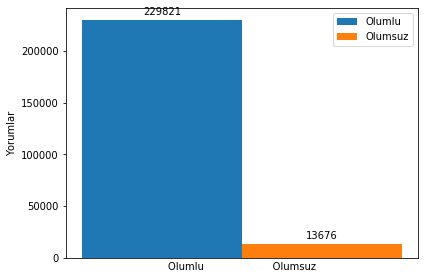

In [96]:
yorum_olumlu  = (len(positive_labels), )
yorum_olumsuz= (len(negative_labels))

ind = np.arange(len(yorum_olumlu))
width = 0.35

fig3, ax = plt.subplots()
rects1 = ax.bar(ind - width/2, yorum_olumlu, width, 
                label='Olumlu')
rects2 = ax.bar(ind + width/2, yorum_olumsuz, width, 
                label='Olumsuz')
ax.set_ylabel('Yorumlar')
ax.set_xticks(ind+1)
ax.set_xlabel('Olumlu                      Olumsuz')
ax.legend()


def otomaticAIPSA(rects, xpos='center'):

    ha = {'center': 'center', 'right': 'left', 'left': 'right'}
    offset = {'center': 0, 'right': 1, 'left': -1}

    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(offset[xpos]*3, 3),
                    textcoords="offset points", 
                    ha=ha[xpos], va='bottom')


otomaticAIPSA(rects1, "center")
otomaticAIPSA(rects2, "center")

fig3.tight_layout()

plt.show()

In [97]:
fig3.savefig(r"C:\Users\alike\Desktop\finalAIPSA\final\AIPSAapp2")

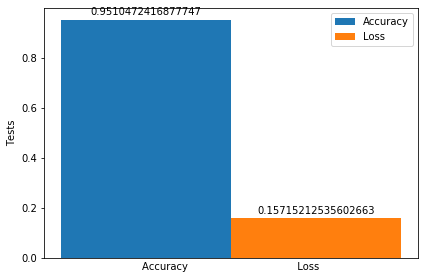

In [98]:
test_accuracy  = (float(gTaccs), )
test_loss= (float(gTloss))

ind = np.arange(len(test_accuracy))
width = 0.35

fig4, ax = plt.subplots()
rects1 = ax.bar(ind - width/2, test_accuracy, width, 
                label='Accuracy')
rects2 = ax.bar(ind + width/2, test_loss, width, 
                label='Loss')
ax.set_ylabel('Tests')
ax.set_xticks(ind+1)
ax.set_xlabel('Accuracy                                   Loss')
ax.legend()


def otomaticAIPSA(rects, xpos='center'):

    ha = {'center': 'center', 'right': 'left', 'left': 'right'}
    offset = {'center': 0, 'right': 1, 'left': -1}

    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(offset[xpos]*3, 3),
                    textcoords="offset points", 
                    ha=ha[xpos], va='bottom')


otomaticAIPSA(rects1, "center")
otomaticAIPSA(rects2, "center")

fig4.tight_layout()

plt.show()

In [99]:
fig4.savefig(r"C:\Users\alike\Desktop\finalAIPSA\final\AIPSAapp2")

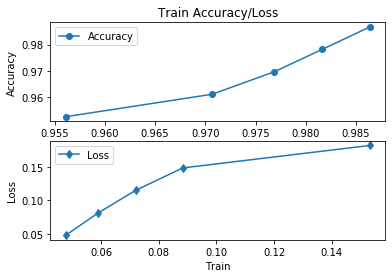

In [100]:
trainacc = gEaccs
trainloss = gEloss

x1 = np.linspace(0.9526789,0.9867298,5)
x2 = np.linspace(0.18152402716600885,0.047995636344408926,5)
fig2 = plt.subplot(2,1,1)
plt.plot(trainacc,x1,marker ='o',label = 'Accuracy')
plt.ylabel('Accuracy')
plt.title('Train Accuracy/Loss')
plt.legend()
fig2 = plt.subplot(2,1,2)
plt.plot(trainloss,x2,label ='Loss',marker='d')
plt.xlabel('Train')
plt.ylabel('Loss')

plt.legend()
plt.show()

In [101]:
fig2.figure.savefig(r"C:\Users\alike\Desktop\finalAIPSA\final\AIPSAapp2")